In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("covid-19-seoul.csv")
df.shape

(119, 7)

In [5]:
df.head()

,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
0,확인중,3.7.,남('64),강남구,-,타시도 확진자 접촉자,서울의료원
1,확인중,3.7.,남('13),관악구,-,타시도 확진자 접촉자,보라매병원
2,확인중,3.7.,남('66),양천구,-,서울 114번 접촉자,서남병원
3,확인중,3.7.,남('55),서초구,-,#935 접촉자,서남병원
4,확인중,3.7.,남('87),은평구,"스페인, 프랑스",확인중,서북병원


In [6]:
df.tail()

,환자,확진일,성별(출생년),거주지,여행력,접촉력,조치사항
114,9,1.31.,여(‵92),성북구,-,#5 접촉자,서울의료원(퇴원)
115,7,1.30.,남(‵91),마포구,중국 우한시,해외 접촉,서울의료원(퇴원)
116,6,1.30.,남(‵64),종로구,-,#3 접촉자,서울대학교병원(퇴원)
117,5,1.30.,남(‵87),중랑구,중국 우한시,해외 접촉,서울의료원(퇴원)
118,2,1.23.,남(‵64),강서구,중국 우한시,해외접촉,국립중앙의료원(퇴원)


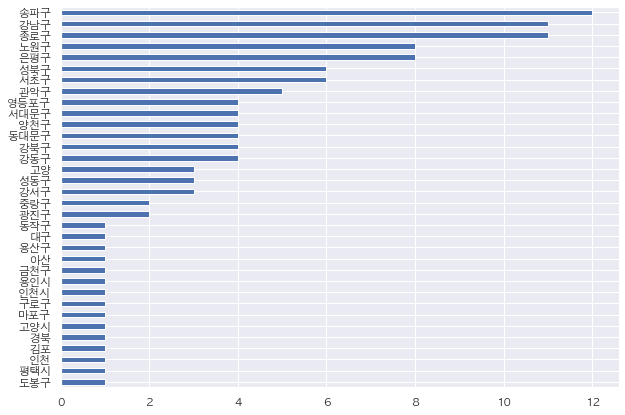

In [8]:
import seaborn as sns

# sns.set(font="Malgun Gothic")
sns.set(font="AppleGothic")
df["거주지"].value_counts().sort_values().plot.barh(figsize=(10, 7))

In [9]:
df["조치사항"].value_counts()

서울의료원          32
서남병원           11
서울의료원(퇴원)       9
보라매병원           9
국립중앙의료원         8
국립중앙의료원(퇴원)     7
서울대학교병원(퇴원)     7
서울대학교병원         5
서북병원            5
중앙대학교병원         3
타시도이관           3
삼육서울병원          2
타시도 이관          2
고대구로병원          2
순천향서울병원         2
한일병원            2
인제대상계백병원        2
보라매병원(퇴원)       2
서울백병원           1
상계백병원           1
중앙대학교병원(퇴원)     1
한양대학교병원(퇴원)     1
한양대학교병원         1
한일병원(퇴원)        1
Name: 조치사항, dtype: int64

In [10]:
df["확진일"].value_counts()

2.25.     16
2.27.     12
2.26.     10
2.28.      7
3.6.       7
3.1.       6
3.2.       6
3.7.       6
2.20.      5
3.4.       5
2.29.      5
2.23.      4
2.22.      4
1.31.      3
1.30.      3
2.24.      3
2.16.      2
2.5.       2
2.21.      2
2.19.      2
2.6.       1
2.7.       1
1.23.      1
3.5.       1
2.25       1
2.2.       1
2.24..     1
2.27       1
3.3.       1
Name: 확진일, dtype: int64

In [11]:
df["확진일자"] = pd.to_datetime("2020"+ "-" + df["확진일"].str.replace(".", "-"))
df["확진일자"].head()

0   2020-03-07
1   2020-03-07
2   2020-03-07
3   2020-03-07
4   2020-03-07
Name: 확진일자, dtype: datetime64[ns]

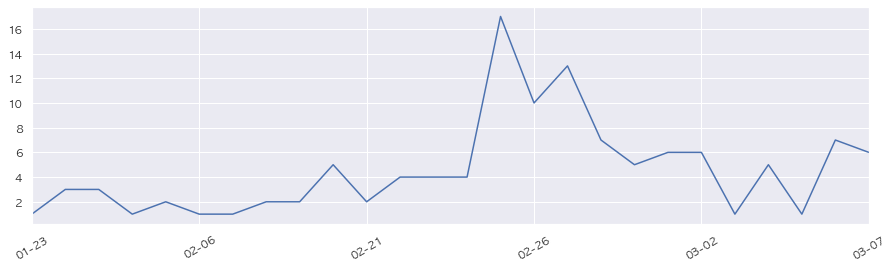

In [13]:
df["월일"] = df["확진일자"].astype(str).map(lambda x : x[-5:])
df["월일"].value_counts().sort_index().plot(figsize=(15, 4), rot=30)

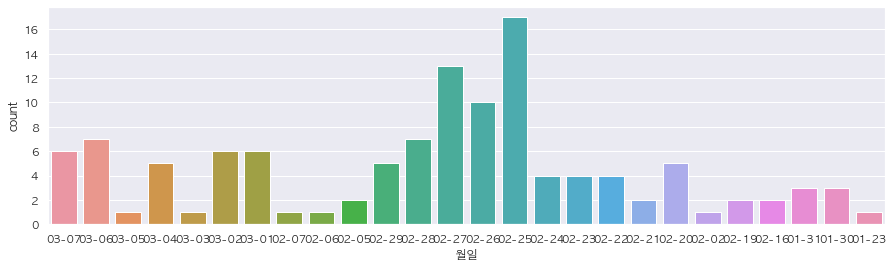

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x="월일")

In [16]:
df["접촉력"].value_counts()

확인중              15
해외 접촉            13
성동구 주상복합 관련      13
타시도 확진자 접촉        8
은평성모병원관련          7
은평성모병원 관련         6
대구 방문             5
#6 접촉자            3
타시도 확진자 접촉        3
대구 확진자 접촉         3
타시도 확진자 접촉자       3
#794 접촉자          2
명성교회 관련           2
#780 접촉자          2
서울 104번 접촉        2
-                 2
신천지대구교회 관련        2
부동산 중개 법인관련       1
쇼핑몰 관련            1
확잍중               1
#1247 접촉자         1
여의도 건설현장관련        1
은평성모병원 연관성 검토     1
서울재생병원 관련         1
#5 접촉자            1
#30접촉자(추정)        1
#56접촉자            1
해외접촉              1
#136접촉자           1
경찰병원관련            1
서울 114번 접촉자       1
#83접촉자            1
#935 접촉자          1
해외 접촉(추정)         1
#6접촉자(추정)         1
 타시도 확진자 접촉       1
부동산 중개업 관련        1
부동산중개법인관련         1
#780 가족(아들)       1
#3 접촉자            1
대구 거주자            1
대구 방문(명성교회)       1
#2621번 접촉자        1
#29접촉자            1
여의도 건설현장 관련       1
Name: 접촉력, dtype: int64

In [32]:
df["접촉경로"] = df["접촉력"]
df.loc[df["접촉력"].str.contains("접촉자"), "접촉경로"] = "접촉자"
df.loc[df["접촉력"].str.contains("은평성모"), "접촉경로"] = "은평성모병원"
df.loc[df["접촉력"].str.contains("가족"), "접촉경로"] = "가족"
df.loc[df["접촉력"].str.contains("부동산"), "접촉경로"] = "부동산중개법인"
df.loc[df["접촉력"].str.contains("부동산"), "접촉경로"] = "부동산중개법인"

In [33]:
df["접촉경로"].value_counts()

접촉자            22
확인중            15
은평성모병원         14
해외 접촉          13
성동구 주상복합 관련    13
타시도 확진자 접촉      8
대구 방문           5
타시도 확진자 접촉      3
부동산중개법인         3
대구 확진자 접촉       3
-               2
서울 104번 접촉      2
명성교회 관련         2
신천지대구교회 관련      2
해외 접촉(추정)       1
서울재생병원 관련       1
 타시도 확진자 접촉     1
확잍중             1
해외접촉            1
가족              1
여의도 건설현장관련      1
대구 거주자          1
대구 방문(명성교회)     1
여의도 건설현장 관련     1
경찰병원관련          1
쇼핑몰 관련          1
Name: 접촉경로, dtype: int64